In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

# Menonaktifkan semua warning
warnings.filterwarnings("ignore")

In [147]:
data = pd.read_csv(r"C:\Users\ramaw\Downloads\McDonalds - India_Menu.csv")
data

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


# Data Cleaning

In [148]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

disini saya menemukan data yang kosong alias isnull pada kolom sodium

In [149]:
data[data['Sodium (mg)'].isnull()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,228 g,443.4,25.63,17.3,4.01,0.19,64.19,43.29,9.29,6.32,NaN


lalu saya mencari tahu data sodium yang memiliki nilai kosong alias isnull, ditemukan menu items Piri piri McSpicy chicken burger

menurut sumber dari salah satu website menyatakan bahwa, Piri piri Mc Spicy Chicken Burger tidak memiliki kadungan sodium.
jadi saya akan mengisi nilai isnull tersebut dengan angka 0
sumber : https://www.myfitnesspal.com/food/calories/piri-piri-chicken-burger-98249300

In [150]:
data['Sodium (mg)'].fillna(0, inplace = True)

In [151]:
# cek kolom sodium, apakah masih memiliki data yang isnull alias kosong
data[data['Sodium (mg)'].isnull()]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)


In [152]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

sudah tidak ada data yang memiliki nilai null

In [153]:
data[data['Sodium (mg)']==0]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
32,Regular Menu,L1 Coffee,200 ml,6.8,0.00,0.0,0.00,0.00,0.00,1.70,0.00,0.00,0.0
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,228 g,443.4,25.63,17.3,4.01,0.19,64.19,43.29,9.29,6.32,0.0


cek data yang memiliki duplikasi

In [154]:
data.duplicated(subset = None).any()

False

In [155]:
data.duplicated(subset = None).sum()

0

In [156]:
data.duplicated(subset = None)

0      False
1      False
2      False
3      False
4      False
       ...  
136    False
137    False
138    False
139    False
140    False
Length: 141, dtype: bool

tidak ada data yang memiliki duplikasi

# ANALISA DATA

In [157]:
data

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8 g,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05
137,Condiments Menu,Maple Syrup,30 g,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
138,Condiments Menu,Cheese Slice,14 g,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95
139,Condiments Menu,Sweet Corn,40 g,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04


analisa berdasarkan 'Menu Category'

In [158]:
# cek berapa data unique yang ada dalam menu category
data['Menu Category'].nunique()

7

In [159]:
# cek distribusi tiap menu category
cek_mc = data['Menu Category'].value_counts().reset_index()
cek_mc.columns = ['Menu Category', 'Total']
cek_mc = pd.DataFrame(cek_mc)
cek_mc

,Menu Category,Total
0,McCafe Menu,51
1,Regular Menu,36
2,Beverages Menu,17
3,Breakfast Menu,15
4,Gourmet Menu,11
5,Condiments Menu,9
6,Desserts Menu,2


Menu Category terbanyak yang ada di McDonald's India adalah McCafe Menu sebanyak 51, sedangkan Menu Category terendah adalah Dessert Menu sebanyak 2.

Kita visualisasikan dengan menggunakan pie chart

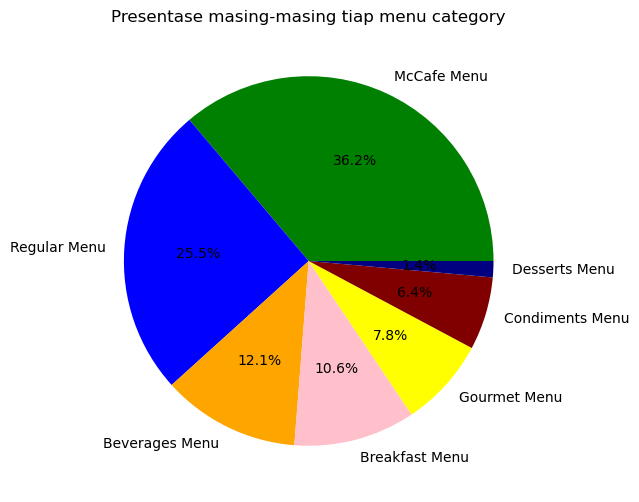

In [160]:
datamc = cek_mc['Total']
indexmc = cek_mc['Menu Category']

fig, axes = plt.subplots(figsize=(6, 6))
plt.pie(datamc, labels=indexmc, colors=["green", "blue", "orange", "pink", "yellow", "maroon", "navy"], autopct='%1.1f%%')
plt.title("Presentase masing-masing tiap menu category", loc="center")
plt.show()

## cek ditiap menu category, yang memiliki kalori tertinggi dan terendah

In [161]:
## buat fungsi untuk visualisasi kalori tiap menu items berdasarkan menu category
categorymenu = ['McCafe Menu', 'Regular Menu', 'Beverages Menu', 'Breakfast Menu', 'Gourmet Menu', 'Condiments Menu', 'Desserts Menu']
def kalori_mc(target, categorymenu):
    data = target['Energy (kCal)']
    index = target['Menu Items']

    fig, axes = plt.subplots(figsize = (15,5))
    fig.tight_layout()

    bars = plt.barh(index, data, color = ['pink', 'green', 'blue', 'orange', 'red'])
    plt.title(f"Distribusi kalori tertinggi untuk menu category = {categorymenu}")

    for bar in bars:
        width = bar.get_width()
        label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
        plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')
    plt.show()

In [162]:
# McCafe Menu kalori tertinggi
filtermccafe_kalori = data[data['Menu Category']=='McCafe Menu']
descmccafe_kalori = filtermccafe_kalori.sort_values('Energy (kCal)', ascending = False)
descmccafe_kalori = pd.DataFrame(descmccafe_kalori)
descmccafe_kalori = descmccafe_kalori.head()
descmccafe_kalori
sorted_data = data.query("`Menu Category` == 'McCafe Menu'").sort_values('Energy (kCal)', ascending = False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
82,McCafe Menu,Chocolate Oreo Frappe,481.11
101,McCafe Menu,Medium Blackforest,429.95
91,McCafe Menu,American Mud Pie Shake,398.19
81,McCafe Menu,Mocha Frappe,397.98
64,McCafe Menu,Hot Chocolate (L),383.29


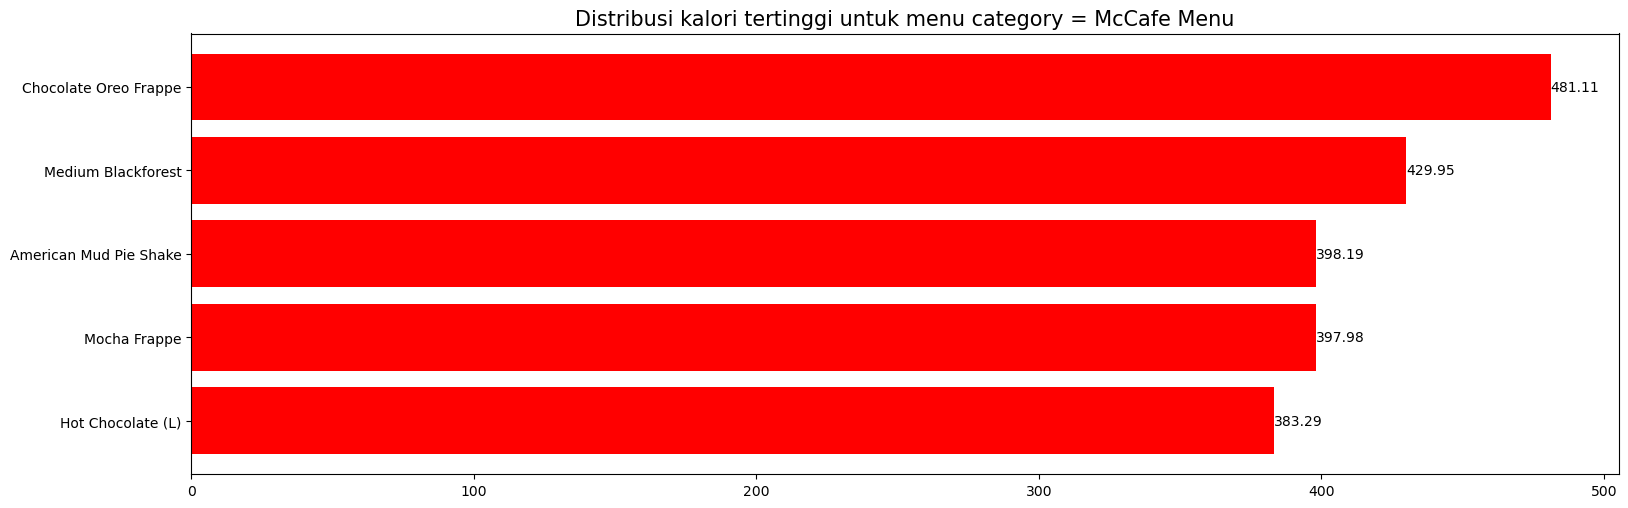

In [163]:
mckaloritinggi = descmccafe_kalori.sort_values('Energy (kCal)', ascending=False)
datamccafe = mckaloritinggi['Energy (kCal)']
indexmccafe = mckaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexmccafe, datamccafe, color='red')
plt.title("Distribusi kalori tertinggi untuk menu category = McCafe Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

In [164]:
# McCafe Menu kalori terendah
filtermccafe_kalori2 = data[data['Menu Category']=='McCafe Menu']
descmccafe_kalori2 = filtermccafe_kalori2.sort_values('Energy (kCal)')
descmccafe_kalori2 = pd.DataFrame(descmccafe_kalori2)
descmccafe_kalori2 = descmccafe_kalori2.head()
descmccafe_kalori2
sorted_data = data.query("`Menu Category` == 'McCafe Menu'").sort_values('Energy (kCal)')
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
70,McCafe Menu,Moroccon Mint Green Tea (S),6.25
73,McCafe Menu,Strawberry Green Tea (S),7.03
71,McCafe Menu,Moroccon Mint Green Tea (R),7.39
74,McCafe Menu,Strawberry Green Tea (R),8.32
67,McCafe Menu,English Breakfast (S),9.93


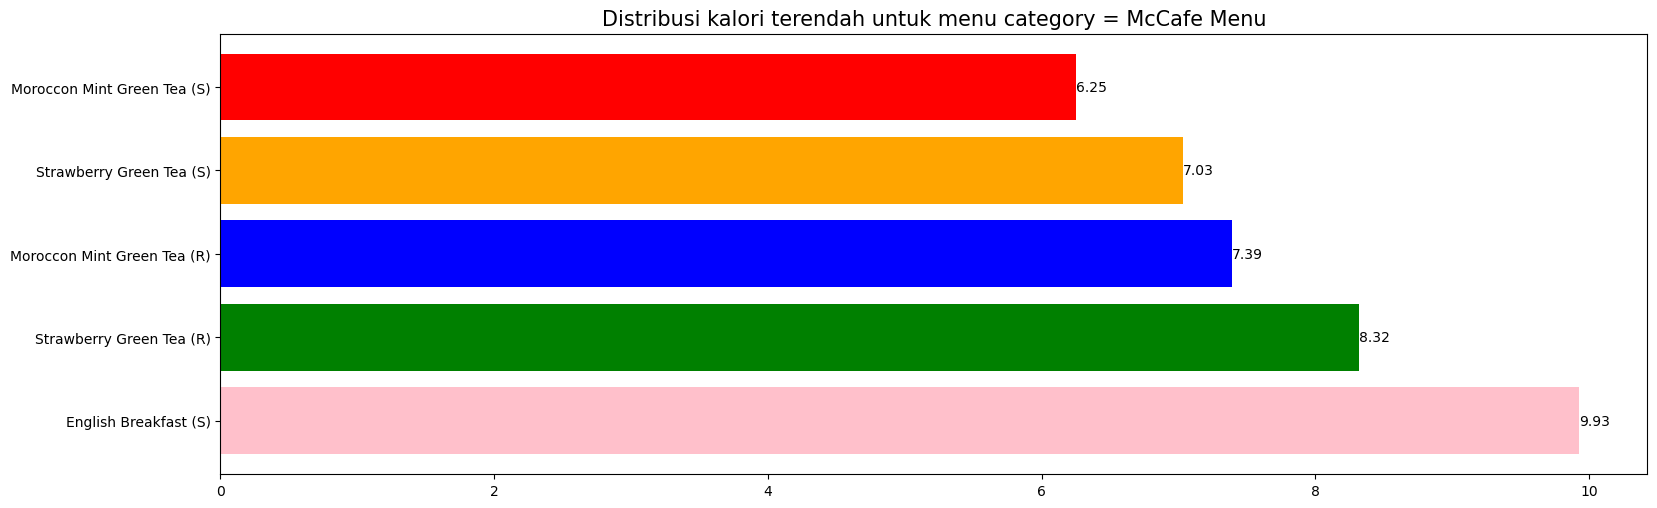

In [165]:
mckaloritinggi = descmccafe_kalori2.sort_values('Energy (kCal)', ascending = False)
datamccafe2 = mckaloritinggi['Energy (kCal)']
indexmccafe2 = mckaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexmccafe2, datamccafe2, color=['pink', 'green', 'blue', 'orange', 'red'])
plt.title("Distribusi kalori terendah untuk menu category = McCafe Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [166]:
filterrm_kalori = data[data['Menu Category']== 'Regular Menu']
rm_kaloridesc = filterrm_kalori.sort_values('Energy (kCal)', ascending = False)
rm_kaloridesc = pd.DataFrame(rm_kaloridesc)
rm_kaloridesc = rm_kaloridesc.head()
rm_kaloridesc
sorted_data = data.query("`Menu Category` == 'Regular Menu'").sort_values('Energy (kCal)', ascending=False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
5,Regular Menu,Veg Maharaja Mac,832.67
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,720.30
12,Regular Menu,Chicken Maharaja Mac,689.12
3,Regular Menu,Spicy Paneer Wrap,674.68
2,Regular Menu,McSpicy™ Paneer Burger,652.76


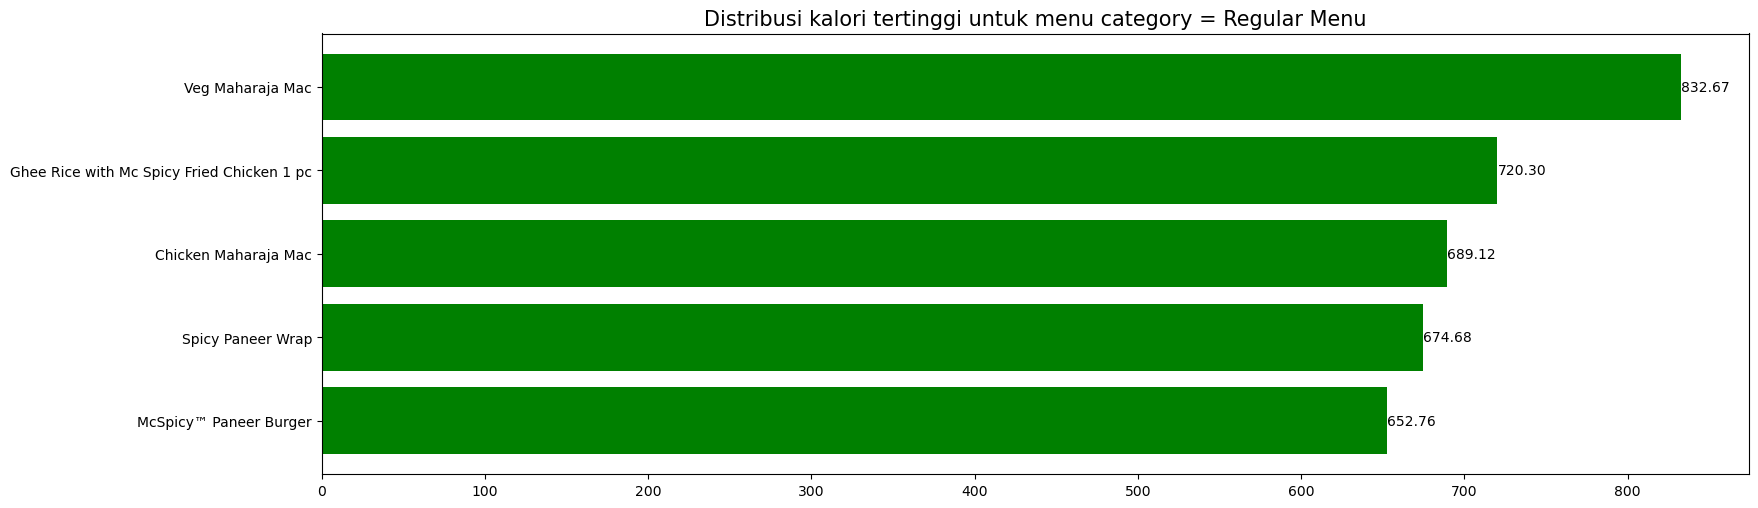

In [167]:
rmkaloritinggi = rm_kaloridesc.sort_values('Energy (kCal)', ascending=False)
datarm = rmkaloritinggi['Energy (kCal)']
indexrm = rmkaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexrm, datarm, color='green')
plt.title("Distribusi kalori tertinggi untuk menu category = Regular Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

In [168]:
rm_kaloriasc = filterrm_kalori.sort_values('Energy (kCal)')
rm_kaloriasc = pd.DataFrame(rm_kaloriasc)
rm_kaloriasc = rm_kaloriasc.head()
rm_kaloriasc
sorted_data = data.query("`Menu Category` == 'Regular Menu'").sort_values('Energy (kCal)')
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
32,Regular Menu,L1 Coffee,6.80
33,Regular Menu,L1 Coffee with milk,35.80
23,Regular Menu,2 piece Chicken Strips,164.44
20,Regular Menu,4 piece Chicken McNuggets,169.68
29,Regular Menu,Regular Wedges,204.65


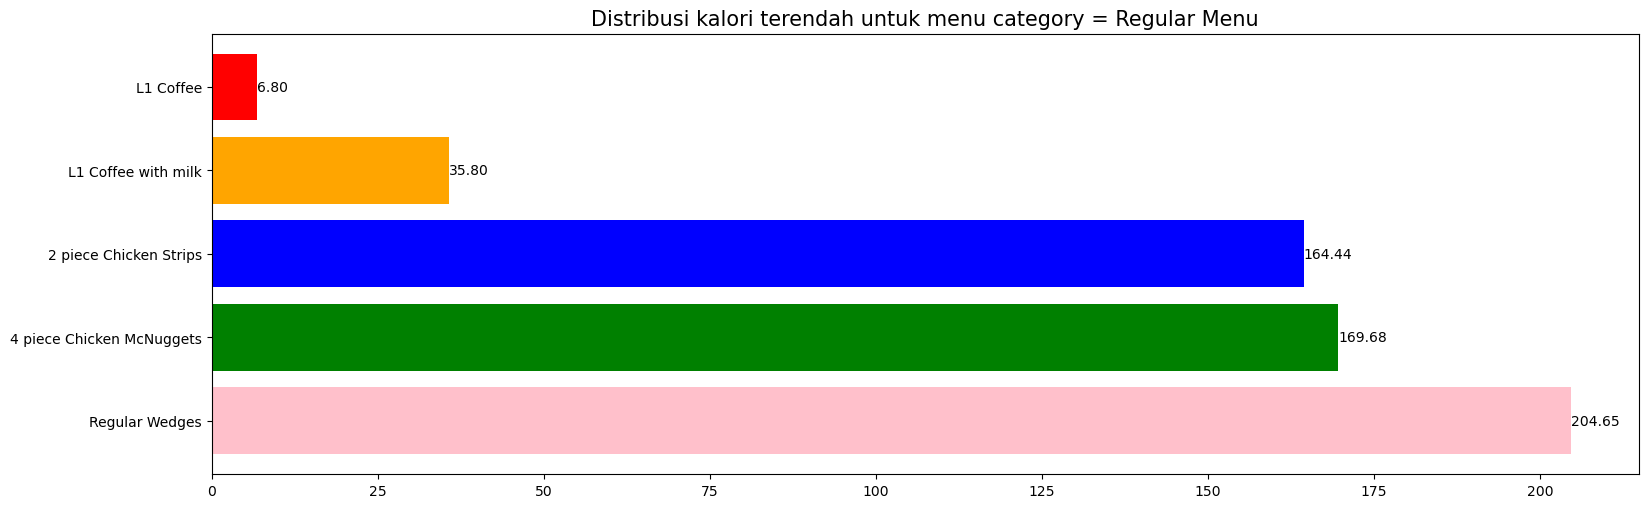

In [169]:
rmkaloritinggi = rm_kaloriasc.sort_values('Energy (kCal)', ascending = False)
datarm2 = rmkaloritinggi['Energy (kCal)']
indexrm2 = rmkaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexrm2, datarm2, color=['pink', 'green', 'blue', 'orange', 'red'])
plt.title("Distribusi kalori terendah untuk menu category = Regular Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [170]:
bvgmenu_filter = data[data['Menu Category']== 'Beverages Menu']
bvgmenu_desc = bvgmenu_filter.sort_values('Energy (kCal)', ascending = False)
bvgmenu_desc = pd.DataFrame(bvgmenu_desc)
bvgmenu_desc = bvgmenu_desc.head()
bvgmenu_desc
sorted_data = data.query("`Menu Category` == 'Beverages Menu'").sort_values('Energy (kCal)', ascending = False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
120,Beverages Menu,Large Fanta Oragne,256.88
126,Beverages Menu,Large Sprite,237.12
117,Beverages Menu,Large Coca-Cola,217.36
123,Beverages Menu,Large Thums-up,197.60
119,Beverages Menu,Medium Fanta Orange,178.88


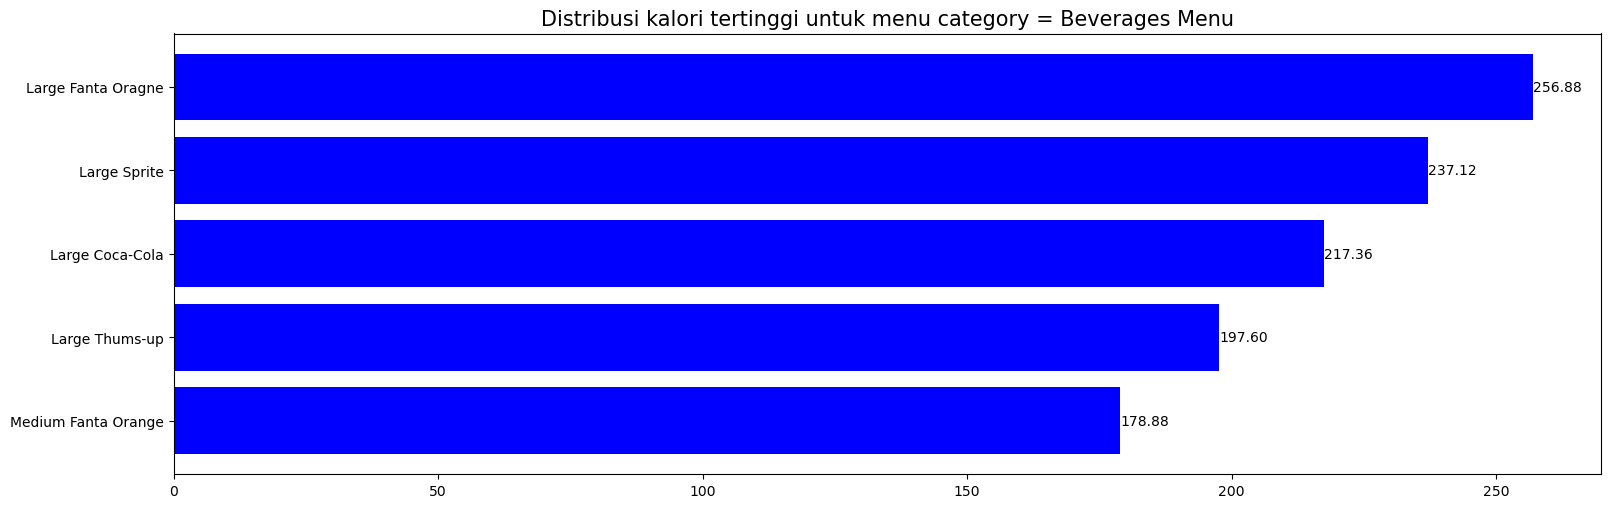

In [171]:
bvgkaloritinggi = bvgmenu_desc.sort_values('Energy (kCal)', ascending=False)
databvg = bvgkaloritinggi['Energy (kCal)']
indexbvg = bvgkaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexbvg, databvg, color='blue')
plt.title("Distribusi kalori tertinggi untuk menu category = Beverages Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

In [172]:
bvgmenu_asc = bvgmenu_filter.sort_values('Energy (kCal)')
bvgmenu_asc = pd.DataFrame(bvgmenu_asc)
bvgmenu_asc = bvgmenu_asc.head()
bvgmenu_asc
sorted_data = data.query("`Menu Category` == 'Beverages Menu'").sort_values('Energy (kCal)')
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
131,Beverages Menu,Vedica Natural Mineral Water,0.00
130,Beverages Menu,Coke Zero Can,0.99
121,Beverages Menu,Small Thums-up,99.60
115,Beverages Menu,Small Coca-Cola,109.56
124,Beverages Menu,Small Sprite,119.52


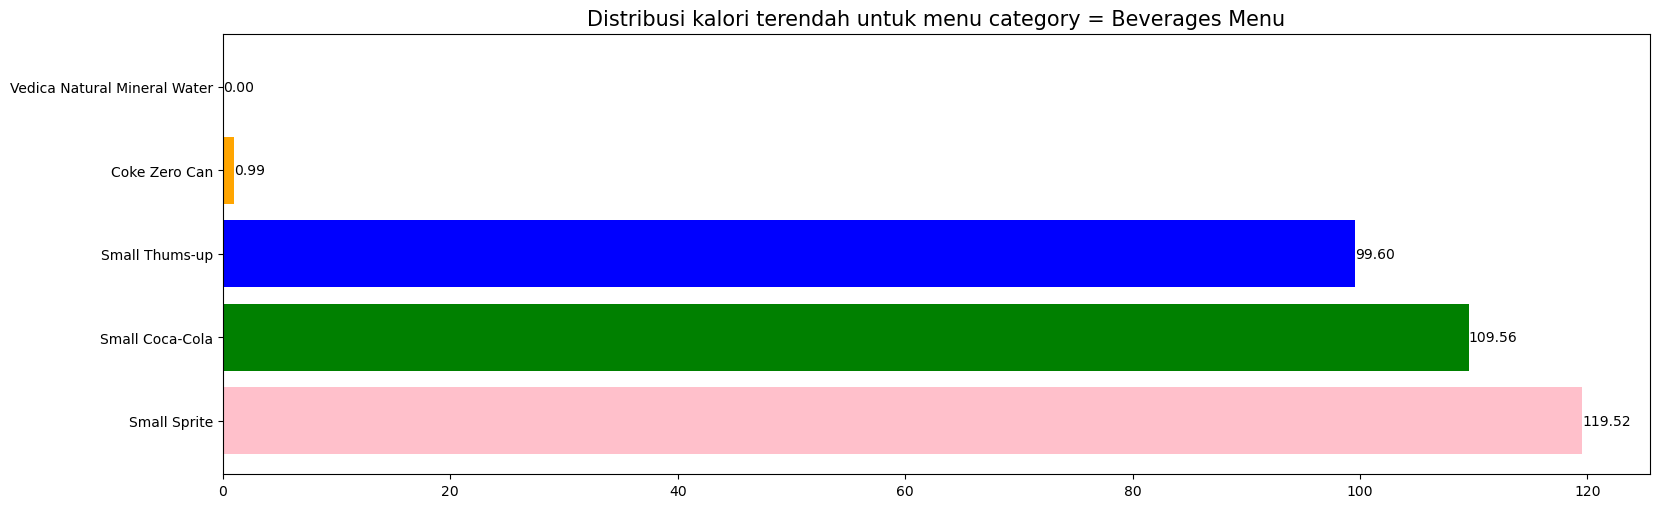

In [173]:
bvgkalorirendah = bvgmenu_asc.sort_values('Energy (kCal)', ascending = False)
databvg2 = bvgkalorirendah['Energy (kCal)']
indexbvg2 = bvgkalorirendah['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexbvg2, databvg2, color=['pink', 'green', 'blue', 'orange', 'red'])
plt.title("Distribusi kalori terendah untuk menu category = Beverages Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [174]:
bfmenukalori = data[data['Menu Category']== 'Breakfast Menu']
bfmenu_desc = bfmenukalori.sort_values('Energy (kCal)', ascending = False)
bfmenu_desc = pd.DataFrame(bfmenu_desc)
bfmenu_desc = bfmenu_desc.head()
bfmenu_desc
sorted_data = data.query("`Menu Category` == 'Breakfast Menu'").sort_values('Energy (kCal)', ascending = False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
42,Breakfast Menu,Hot Cake with maple syrup,432.98
36,Breakfast Menu,Veg McMuffin,309.35
40,Breakfast Menu,Sausage Mc Muffin with egg,290.42
41,Breakfast Menu,Egg McMuffin,283.46
39,Breakfast Menu,Sausage Mc Muffin,281.44


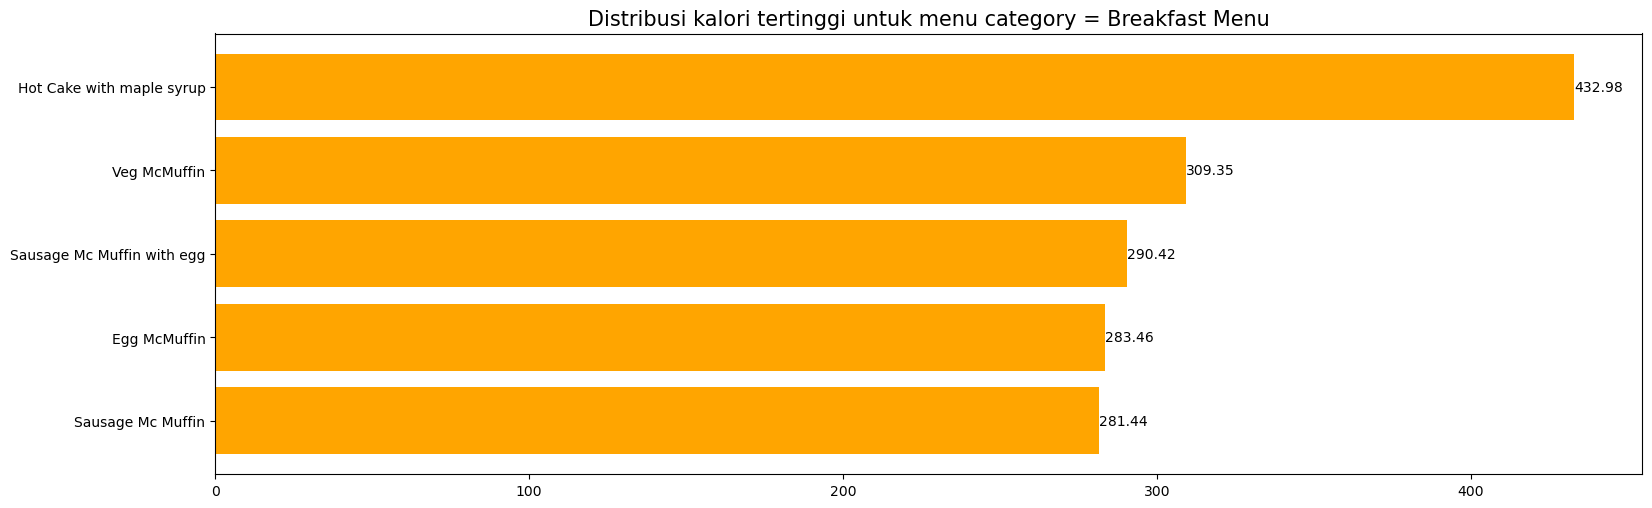

In [175]:
bfkaloritinggi = bfmenu_desc.sort_values('Energy (kCal)', ascending=False)
databf = bfkaloritinggi['Energy (kCal)']
indexbf = bfkaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexbf, databf, color='orange')
plt.title("Distribusi kalori tertinggi untuk menu category = Breakfast Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

In [176]:
bfmenu_asc = bfmenukalori.sort_values('Energy (kCal)')
bfmenu_asc = pd.DataFrame(bfmenu_asc)
bfmenu_asc = bfmenu_asc.head()
bfmenu_asc
sorted_data = data.query("`Menu Category` == 'Breakfast Menu'").sort_values('Energy (kCal)')
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
44,Breakfast Menu,Espresso,12.87
46,Breakfast Menu,Americano (S),12.87
47,Breakfast Menu,Americano (R),23.07
48,Breakfast Menu,Americano (L),26.71
45,Breakfast Menu,Espresso Machiato,44.98


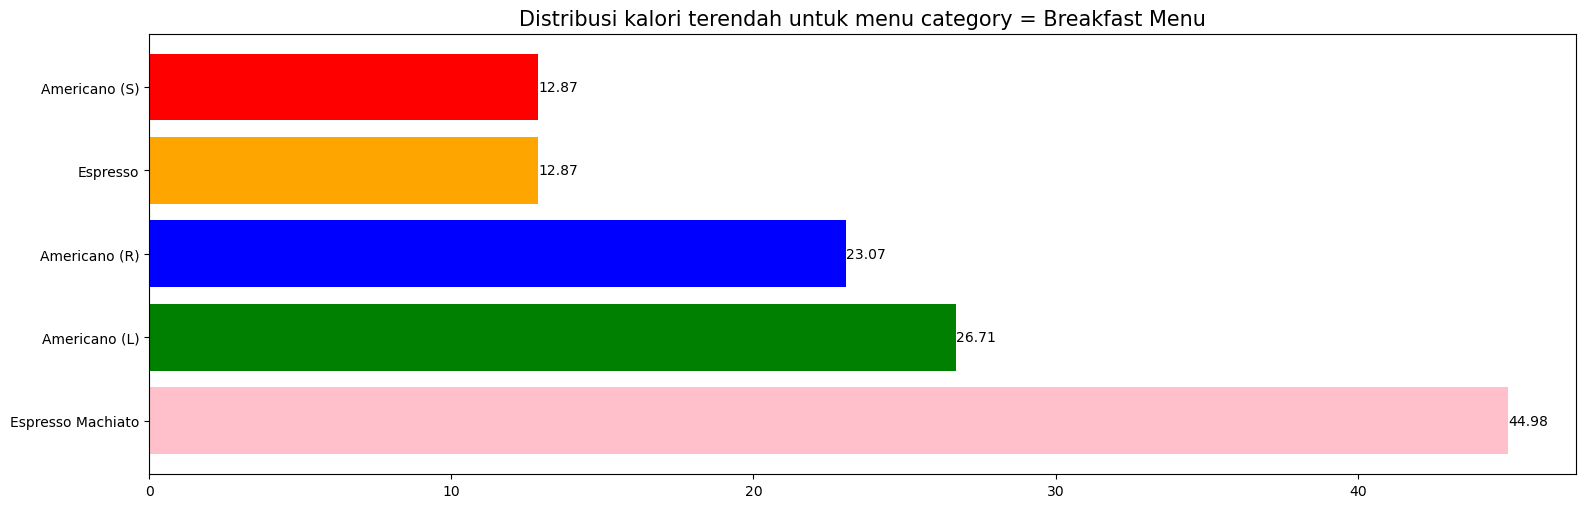

In [177]:
bfkalorirendah = bfmenu_asc.sort_values('Energy (kCal)', ascending = False)
databf2 = bfkalorirendah['Energy (kCal)']
indexbf2 = bfkalorirendah['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexbf2, databf2, color=['pink', 'green', 'blue', 'orange', 'red'])
plt.title("Distribusi kalori terendah untuk menu category = Breakfast Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [178]:
gmmenu_filter = data[data['Menu Category']== 'Gourmet Menu']
gmmenu_desc = gmmenu_filter.sort_values('Energy (kCal)', ascending = False)
gmmenu_desc = pd.DataFrame(gmmenu_desc)
gmmenu_desc = gmmenu_desc.head()
gmmenu_desc
sorted_data = data.query("`Menu Category` == 'Gourmet Menu'").sort_values('Energy (kCal)', ascending = False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
107,Gourmet Menu,Chicken Cheese Lava Burger,834.36
106,Gourmet Menu,Cheese Lava Burger,671.06
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,641.36
110,Gourmet Menu,McSpicy Premium Veg Burger,634.71
109,Gourmet Menu,McSpicy Premium Chicken Burger,622.25


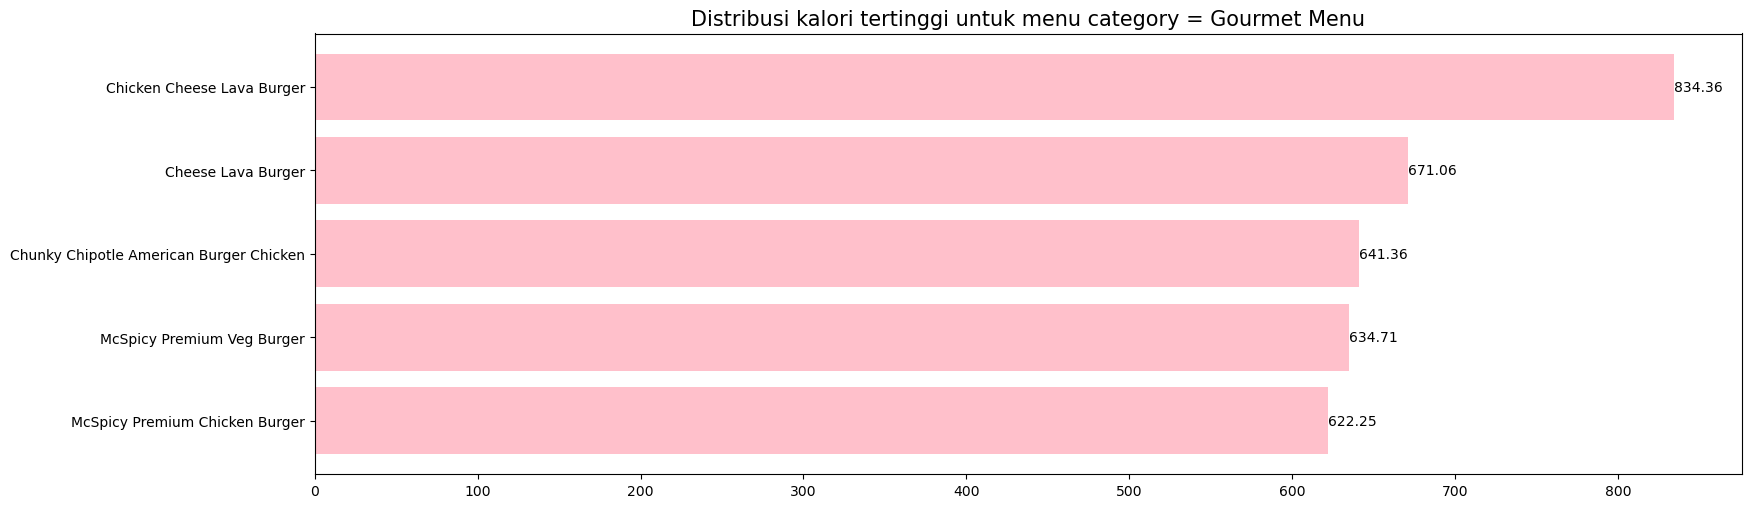

In [179]:
gmkaloritinggi = gmmenu_desc.sort_values('Energy (kCal)', ascending=False)
datagm = gmkaloritinggi['Energy (kCal)']
indexgm = gmkaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexgm, datagm, color='pink')
plt.title("Distribusi kalori tertinggi untuk menu category = Gourmet Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

In [180]:
gmmenu_asc = gmmenu_filter.sort_values('Energy (kCal)')
gmmenu_asc = pd.DataFrame(gmmenu_asc)
gmmenu_asc = gmmenu_asc.head()
gmmenu_asc
sorted_data = data.query("`Menu Category` == 'Gourmet Menu'").sort_values('Energy (kCal)')
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
113,Gourmet Menu,Cheesy Veg Nuggets (6pc),252.29
114,Gourmet Menu,Cheesy Veg Nuggets (9pc),378.43
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,443.40
104,Gourmet Menu,American Triple Cheese Chicken,457.94
112,Gourmet Menu,Piri piri Mc Spicy Veg Burger,517.98


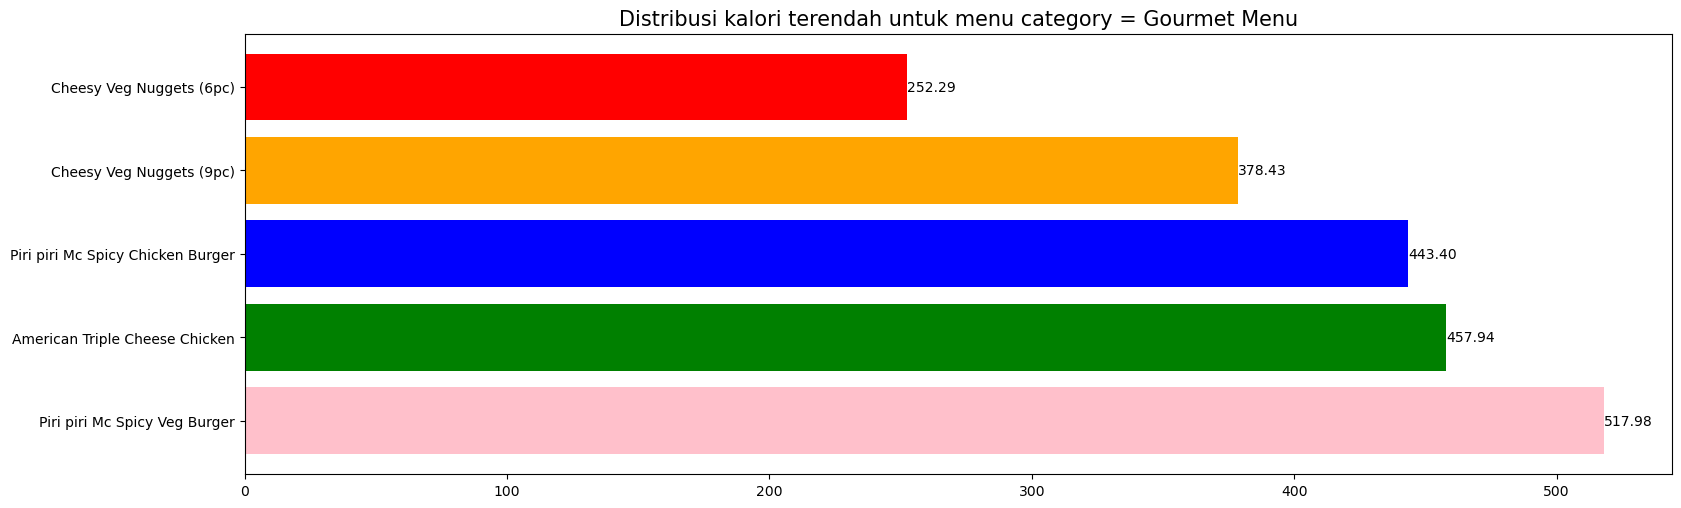

In [181]:
gmkalorirendah = gmmenu_asc.sort_values('Energy (kCal)', ascending = False)
datagm2 = gmkalorirendah['Energy (kCal)']
indexgm2 = gmkalorirendah['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexgm2, datagm2, color=['pink', 'green', 'blue', 'orange', 'red'])
plt.title("Distribusi kalori terendah untuk menu category = Gourmet Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [182]:
cmkalorifilter = data[data['Menu Category']== 'Condiments Menu']
cmmenudesc = cmkalorifilter.sort_values('Energy (kCal)', ascending = False)
cmmenudesc = pd.DataFrame(cmmenudesc)
cmmenudesc = cmmenudesc.head()
cmmenudesc
sorted_data = data.query("`Menu Category` == 'Condiments Menu'").sort_values('Energy (kCal)', ascending = False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
137,Condiments Menu,Maple Syrup,86.40
132,Condiments Menu,Mustard diping sauce,81.18
140,Condiments Menu,Mixed Fruit Beverage,72.25
133,Condiments Menu,BBQ diping sauce,54.89
138,Condiments Menu,Cheese Slice,51.03


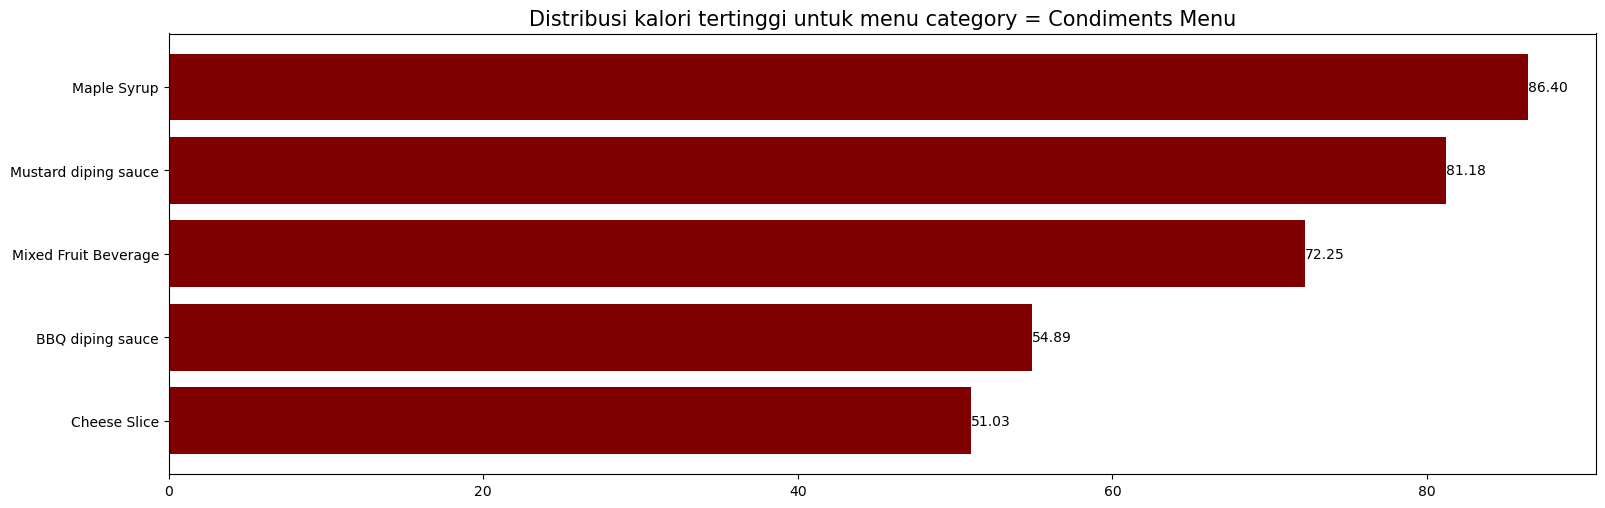

In [183]:
cmkaloritinggi = cmmenudesc.sort_values('Energy (kCal)', ascending=False)
datacm = cmkaloritinggi['Energy (kCal)']
indexcm = cmkaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexcm, datacm, color='maroon')
plt.title("Distribusi kalori tertinggi untuk menu category = Condiments Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

In [184]:
cmmenuasc = cmkalorifilter.sort_values('Energy (kCal)')
cmmenuasc = pd.DataFrame(cmmenuasc)
cmmenuasc = cmmenuasc.head()
cmmenuasc
sorted_data = data.query("`Menu Category` == 'Condiments Menu'").sort_values('Energy (kCal)')
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
134,Condiments Menu,Chilli Sauce,8.07
136,Condiments Menu,Tomato Ketchup Sachets,11.23
135,Condiments Menu,Piri Piri Mix,17.13
139,Condiments Menu,Sweet Corn,45.08
138,Condiments Menu,Cheese Slice,51.03


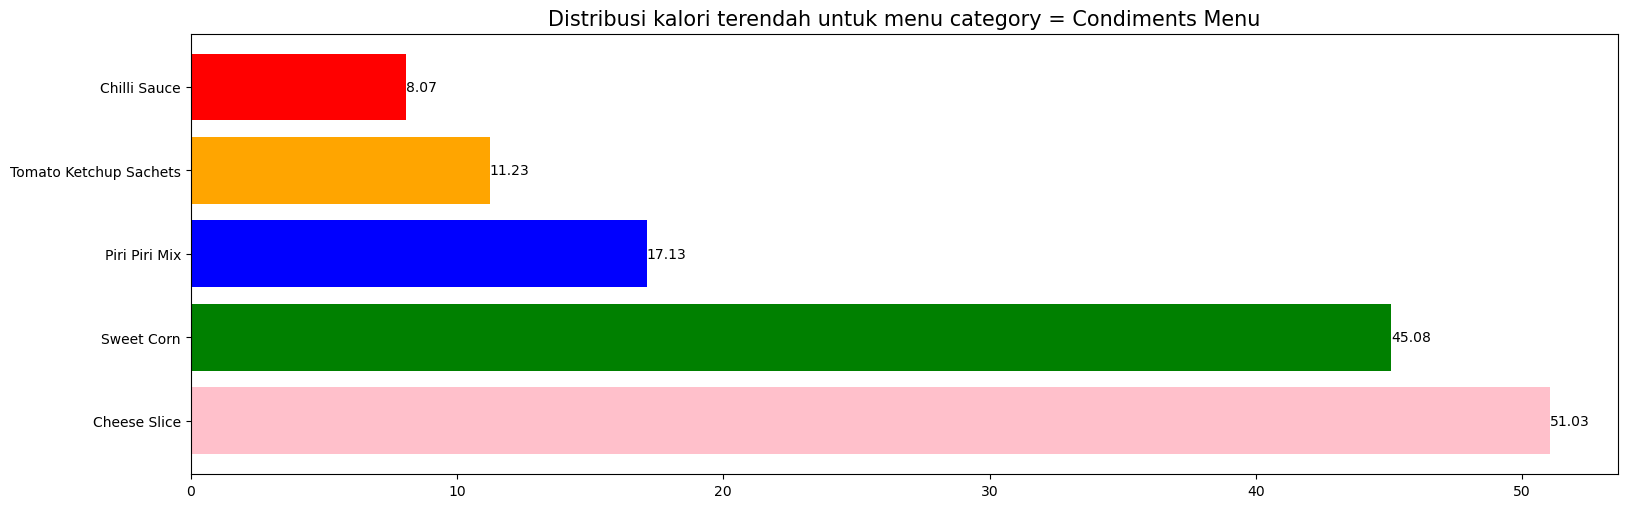

In [185]:
cmkalorirendah = cmmenuasc.sort_values('Energy (kCal)', ascending = False)
datacm2 = cmkalorirendah['Energy (kCal)']
indexcm2 = cmkalorirendah['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexcm2, datacm2, color=['pink', 'green', 'blue', 'orange', 'red'])
plt.title("Distribusi kalori terendah untuk menu category = Condiments Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.show()

In [186]:
dskalorifilter = data[data['Menu Category']=='Desserts Menu']
dsmenudesc = dskalorifilter.sort_values('Energy (kCal)', ascending = False)
dsmenudesc = pd.DataFrame(dsmenudesc)
dsmenudesc = dsmenudesc.head()
dsmenudesc
sorted_data = data.query("`Menu Category` == 'Desserts Menu'").sort_values('Energy (kCal)', ascending = False)
sorted_data = sorted_data[['Menu Category', 'Menu Items', 'Energy (kCal)']]
sorted_data.head()

,Menu Category,Menu Items,Energy (kCal)
103,Desserts Menu,Regular McFlurry - Oreo,209.39
102,Desserts Menu,Small McFlurry - Oreo,116.36


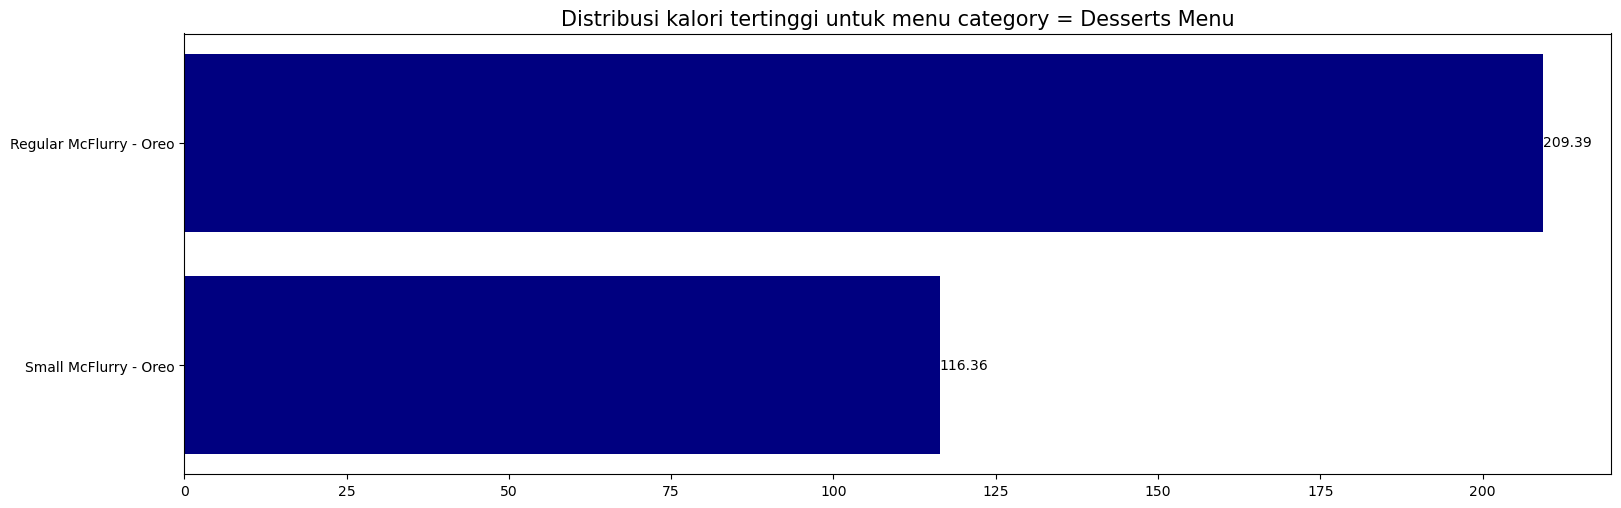

In [187]:
dskaloritinggi = dsmenudesc.sort_values('Energy (kCal)', ascending=False)
datads = dskaloritinggi['Energy (kCal)']
indexds = dskaloritinggi['Menu Items']

fig, axes = plt.subplots(figsize=(15, 5))
fig.tight_layout()

bars = plt.barh(indexds, datads, color='navy')
plt.title("Distribusi kalori tertinggi untuk menu category = Desserts Menu", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)  # Format nilai menjadi dua desimal angka
    plt.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

# Mengurutkan sumbu y (Menu Items) secara descending
plt.gca().invert_yaxis()

plt.show()

## mencari rata-rata kalori dari tiap menu category

In [188]:
avgkalori_mc = data.groupby('Menu Category')['Energy (kCal)'].mean()
avgkalori_mc = pd.DataFrame(avgkalori_mc)
avgkalori_mc = avgkalori_mc.sort_values('Energy (kCal)', ascending = False)
avgkalori_mc

,Energy (kCal)
Menu Category,
Gourmet Menu,543.497273
Regular Menu,367.737778
McCafe Menu,183.679608
Breakfast Menu,181.290000
Desserts Menu,162.875000
Beverages Menu,143.326471
Condiments Menu,47.473333


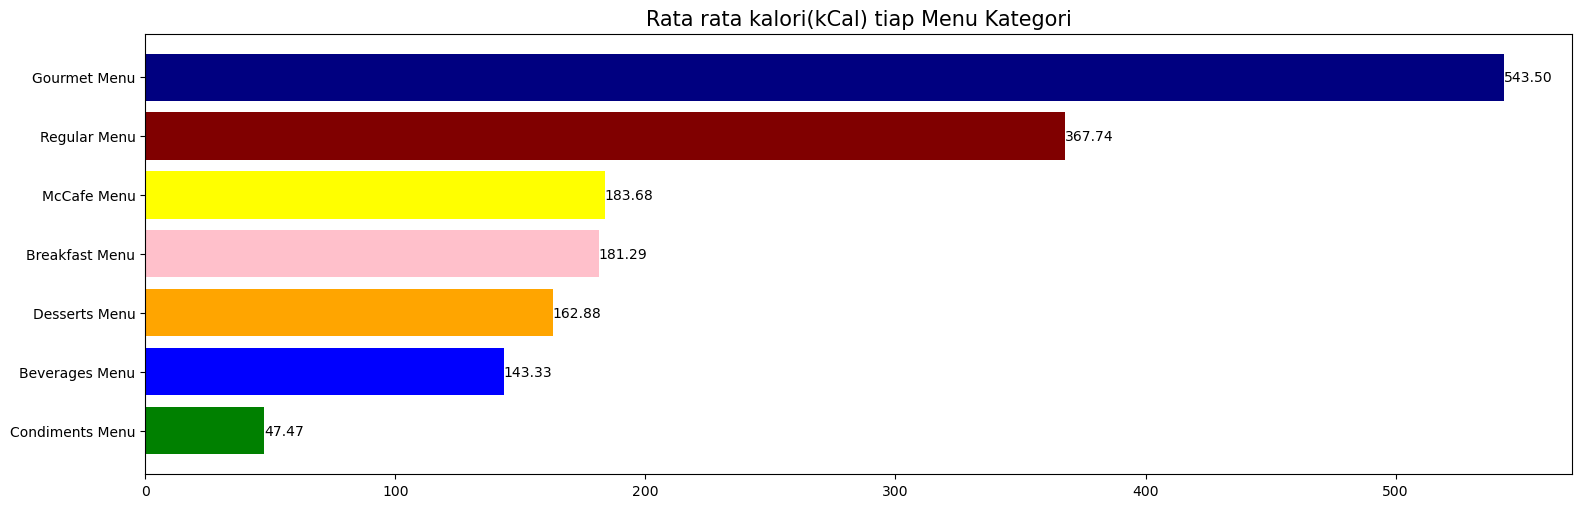

In [189]:
from matplotlib import cm

avgkalorimc = avgkalori_mc.sort_values('Energy (kCal)')
datakalorimc = avgkalorimc['Energy (kCal)']
indexkalorimc = avgkalorimc.index

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()

cmap = cm.get_cmap('inferno')
norm = plt.Normalize(vmin=datakalorimc.min(), vmax=datakalorimc.max())
colors = cmap(norm(datakalorimc))
bars = plt.barh(indexkalorimc, datakalorimc, color = ["green", "blue", "orange", "pink", "yellow", "maroon", "navy"])
plt.title("Rata rata kalori(kCal) tiap Menu Kategori", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

In [190]:
data.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


## mencari kadungan protein, lemak, karbohidrat dari menu-menu tersebut(tertinggi dan terendah).

In [191]:
## mencari protein tertinggi dan terendah
print('Protein tertinggi: ', data['Protein (g)'].max())
print('Protein terendah: ', data['Protein (g)'].min())

Protein tertinggi:  39.47
Protein terendah:  0.0


In [192]:
## mencari berapa banyak menu yang memiliki protein 0
zero_protein_count = (data['Protein (g)'] == 0).sum()
print('Berapa banyak menu yang memiliki protein 0: ', zero_protein_count)

Berapa banyak menu yang memiliki protein 0:  16


In [193]:
## mencari 5 menu makanan dengan protein tertinggi
proteintertinggi = data[['Menu Category', 'Menu Items', 'Protein (g)']]
proteintertinggi = proteintertinggi.sort_values('Protein (g)', ascending = False)
proteintertinggi = pd.DataFrame(proteintertinggi)
proteintertinggi = proteintertinggi.head()
proteintertinggi

,Menu Category,Menu Items,Protein (g)
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,39.47
12,Regular Menu,Chicken Maharaja Mac,34.00
109,Gourmet Menu,McSpicy Premium Chicken Burger,31.49
107,Gourmet Menu,Chicken Cheese Lava Burger,27.37
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,26.91


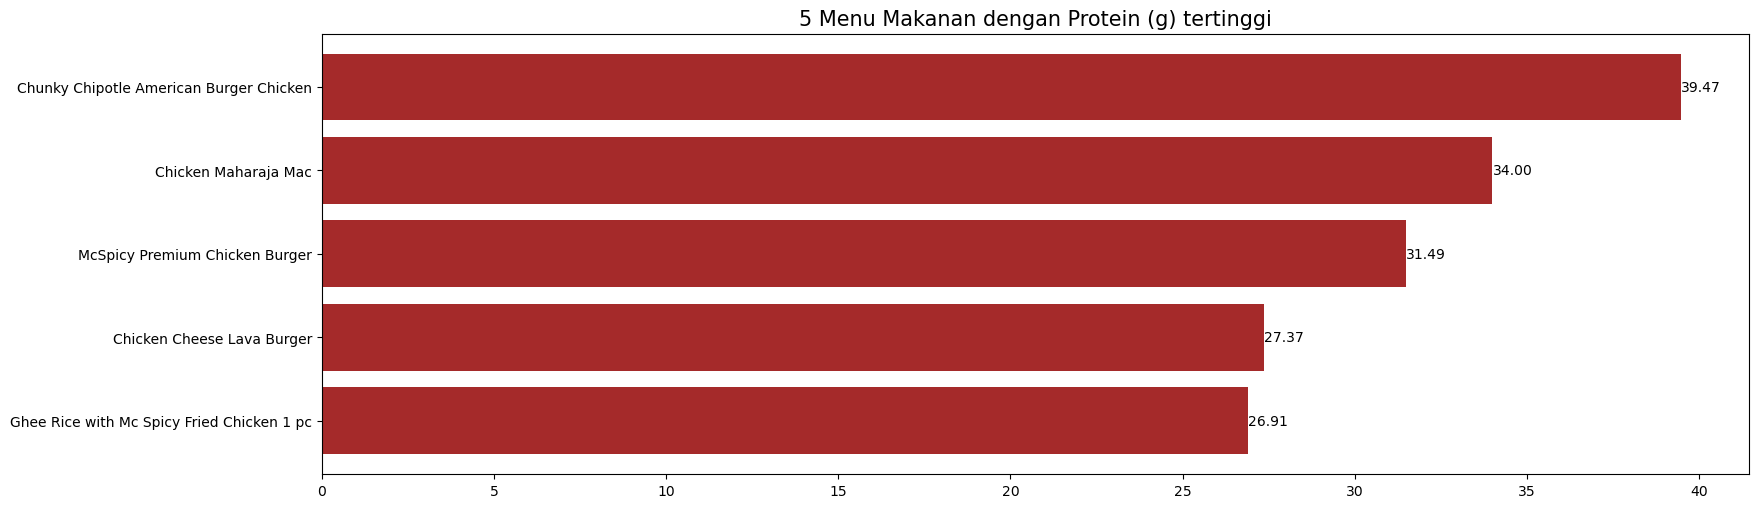

In [194]:
visualproteintinggi = proteintertinggi.sort_values('Protein (g)')
datavpt = visualproteintinggi['Protein (g)']
indexvpt = visualproteintinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvpt, datavpt, color = 'brown')
plt.title("5 Menu Makanan dengan Protein (g) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

In [195]:
## tampilkan 16 menu yang memiliki 0 protein
proteinrendah = data[data['Protein (g)']== 0]
proteinrendah = proteinrendah[['Menu Category', 'Menu Items', 'Protein (g)']]
proteinrendah = pd.DataFrame(proteinrendah)
proteinrendah

,Menu Category,Menu Items,Protein (g)
32,Regular Menu,L1 Coffee,0.0
115,Beverages Menu,Small Coca-Cola,0.0
116,Beverages Menu,Medium Coca-Cola,0.0
117,Beverages Menu,Large Coca-Cola,0.0
118,Beverages Menu,Small Fanta Oragne,0.0
119,Beverages Menu,Medium Fanta Orange,0.0
120,Beverages Menu,Large Fanta Oragne,0.0
121,Beverages Menu,Small Thums-up,0.0
122,Beverages Menu,Medium Thums-up,0.0
123,Beverages Menu,Large Thums-up,0.0


bisa kita lihat, menu yang memiliki nilai protein 0 hampir seluruhnya = kategori minuman.

## Mencari lemak tertinggi dan terendah dari tiap menu items

In [196]:
## mencari nilai lemak tertinggi dan terendah
print('Nilai lemak tertinggi', data['Total fat (g)'].max())
print('Nilai lemak tertinggi', data['Total fat (g)'].min())

Nilai lemak tertinggi 45.18
Nilai lemak tertinggi 0.0


In [197]:
# mencari berapa banyak lemak yang memiliki nilai 0
count_totalfat_zero = (data['Total fat (g)']==0).sum()
print('Jumlah Lemak yang memiliki nilai 0: ', count_totalfat_zero)

Jumlah Lemak yang memiliki nilai 0:  16


In [198]:
lemakterendah = data[data['Total fat (g)']==0]
lemakterendah = lemakterendah[['Menu Category', 'Menu Items', 'Total fat (g)']]
lemakterendah = pd.DataFrame(lemakterendah)
lemakterendah.head()

,Menu Category,Menu Items,Total fat (g)
32,Regular Menu,L1 Coffee,0.0
115,Beverages Menu,Small Coca-Cola,0.0
116,Beverages Menu,Medium Coca-Cola,0.0
117,Beverages Menu,Large Coca-Cola,0.0
118,Beverages Menu,Small Fanta Oragne,0.0


diatas ini adalah menu-menu yang mempunyai total fat terendah alias 0.
hasil ini juga sama dengan menu-menu yang memiliki protein terendah.

In [199]:
## mencari 5 lemak tertinggi dalam menu mcdonalds
lemaktertinggi = data[['Menu Category', 'Menu Items', 'Total fat (g)']]
lemaktertinggi = lemaktertinggi.sort_values('Total fat (g)', ascending = False)
lemaktertinggi = pd.DataFrame(lemaktertinggi)
lemaktertinggi = lemaktertinggi.head()
lemaktertinggi

,Menu Category,Menu Items,Total fat (g)
107,Gourmet Menu,Chicken Cheese Lava Burger,45.18
2,Regular Menu,McSpicy™ Paneer Burger,39.45
110,Gourmet Menu,McSpicy Premium Veg Burger,39.21
3,Regular Menu,Spicy Paneer Wrap,39.10
5,Regular Menu,Veg Maharaja Mac,37.94


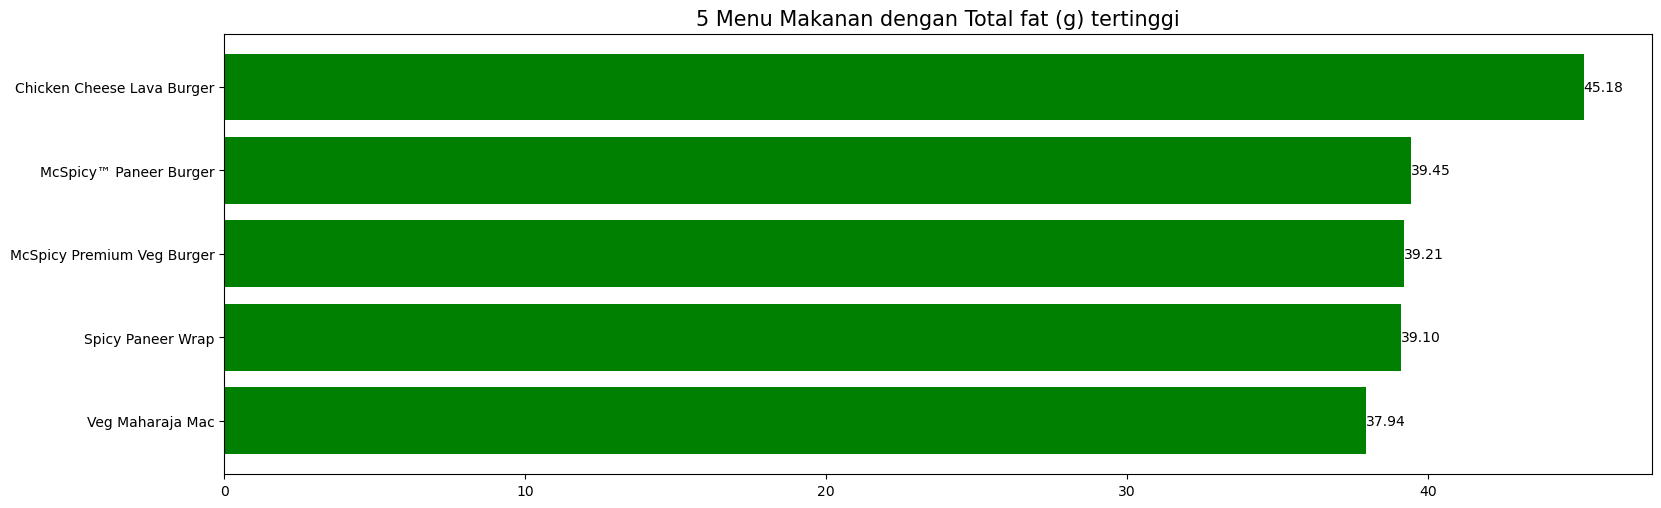

In [200]:
visuallemaktinggi = lemaktertinggi.sort_values('Total fat (g)')
datavlt = visuallemaktinggi['Total fat (g)']
indexvlt = visuallemaktinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvlt, datavlt, color = 'green')
plt.title("5 Menu Makanan dengan Total fat (g) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

## mencari karbohidrat tertinggi dan terendah dalam menu mcdonalds

In [201]:
## mencari nilai karbohidrat tertinggi dan terendah
print('Nilai karbohidrat tertinggi: ', data['Total carbohydrate (g)'].max())
print('Nilai karbohidrat terendah: ', data['Total carbohydrate (g)'].min())

Nilai karbohidrat tertinggi:  93.84
Nilai karbohidrat terendah:  0.0


In [202]:
## mencari 5 menu dengan karbohidrat tertinggi
karbotinggi = data[['Menu Category', 'Menu Items', 'Total carbohydrate (g)']]
karbotinggi = karbotinggi.sort_values('Total carbohydrate (g)', ascending = False)
karbotinggi = pd.DataFrame(karbotinggi)
karbotinggi = karbotinggi.head()
karbotinggi

,Menu Category,Menu Items,Total carbohydrate (g)
5,Regular Menu,Veg Maharaja Mac,93.84
101,McCafe Menu,Medium Blackforest,79.04
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,77.47
107,Gourmet Menu,Chicken Cheese Lava Burger,76.03
106,Gourmet Menu,Cheese Lava Burger,74.25


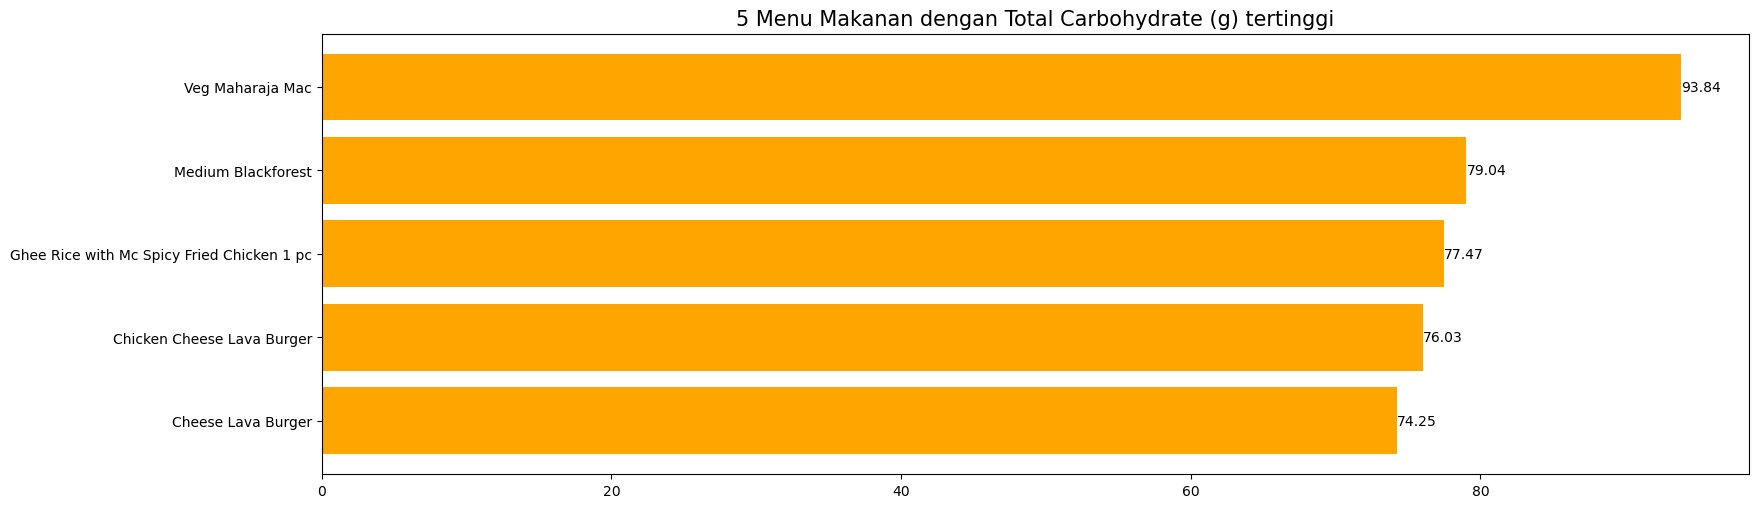

In [203]:
visualkarbotinggi = karbotinggi.sort_values('Total carbohydrate (g)')
datavkt = visualkarbotinggi['Total carbohydrate (g)']
indexvkt = visualkarbotinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvkt, datavkt, color = 'orange')
plt.title("5 Menu Makanan dengan Total Carbohydrate (g) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

In [204]:
## mencari berapa total karbohidrat dengan nilai 0
zero_carbo_count = (data['Total carbohydrate (g)']==0).sum()
print("Total carbo yang memiliki nilai 0: ", zero_carbo_count)

Total carbo yang memiliki nilai 0:  2


In [205]:
## menampilkan 5 menu yang memiliki carbo terendah
karborendah = data[['Menu Category', 'Menu Items', 'Total carbohydrate (g)']]
karborendah = karborendah.sort_values('Total carbohydrate (g)')
karborendah = pd.DataFrame(karborendah)
karborendah.head()

,Menu Category,Menu Items,Total carbohydrate (g)
131,Beverages Menu,Vedica Natural Mineral Water,0.00
130,Beverages Menu,Coke Zero Can,0.00
67,McCafe Menu,English Breakfast (S),0.28
68,McCafe Menu,English Breakfast (R),0.33
69,McCafe Menu,English Breakfast (L),0.46


In [206]:
data.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


## mencari makanan dengan kandungan gula, kolesterol, dan sodium tertinggi.

In [207]:
## mencari 5 menu makanan dengan kandungan gula tertinggi.
gulatertinggi = data[['Menu Category', 'Menu Items', 'Total Sugars (g)']]
gulatertinggi = gulatertinggi.sort_values('Total Sugars (g)', ascending = False)
gulatertinggi = pd.DataFrame(gulatertinggi)
gulatertinggi = gulatertinggi.head()
gulatertinggi

,Menu Category,Menu Items,Total Sugars (g)
120,Beverages Menu,Large Fanta Oragne,64.22
126,Beverages Menu,Large Sprite,59.28
82,McCafe Menu,Chocolate Oreo Frappe,55.14
117,Beverages Menu,Large Coca-Cola,54.34
91,McCafe Menu,American Mud Pie Shake,53.40


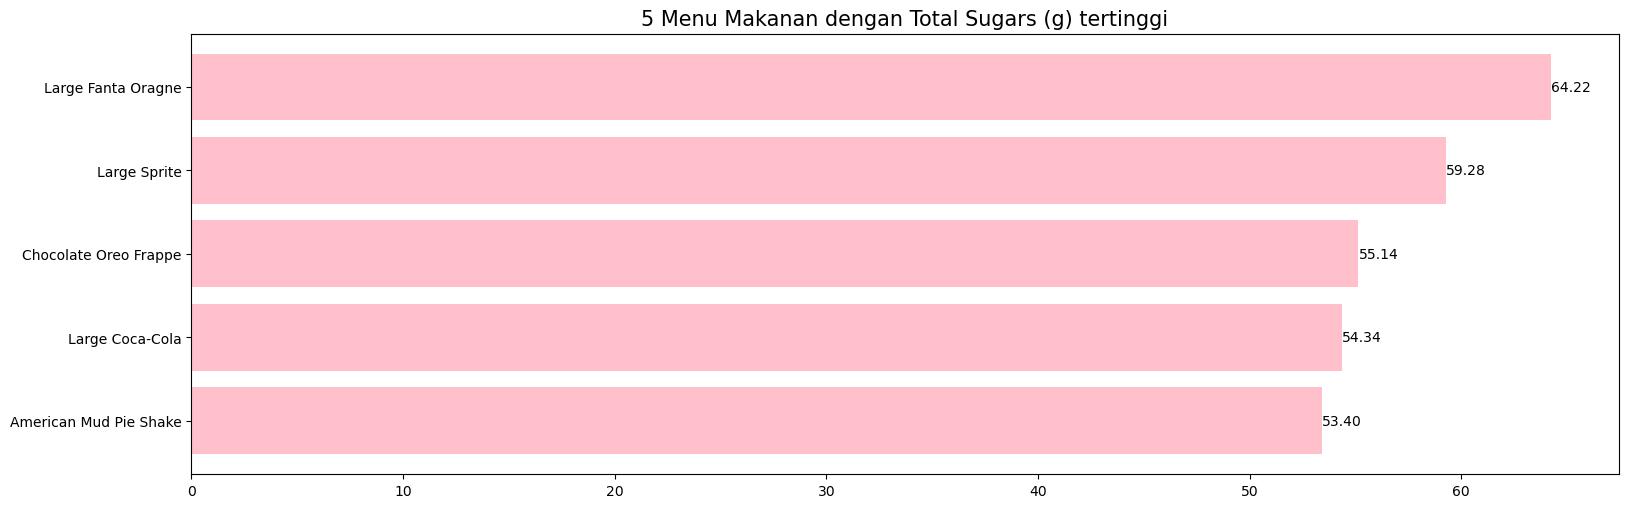

In [208]:
visualgulatinggi = gulatertinggi.sort_values('Total Sugars (g)')
datavgt = visualgulatinggi['Total Sugars (g)']
indexvgt = visualgulatinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvgt, datavgt, color = 'pink')
plt.title("5 Menu Makanan dengan Total Sugars (g) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

In [209]:
## mencari 5 menu makanan dengan kandungan kolesterol tertinggi.
kolesteroltertinggi = data[['Menu Category', 'Menu Items', 'Cholesterols (mg)']]
kolesteroltertinggi = kolesteroltertinggi.sort_values('Cholesterols (mg)', ascending = False)
kolesteroltertinggi = pd.DataFrame(kolesteroltertinggi)
kolesteroltertinggi = kolesteroltertinggi.head()
kolesteroltertinggi

,Menu Category,Menu Items,Cholesterols (mg)
109,Gourmet Menu,McSpicy Premium Chicken Burger,302.61
40,Breakfast Menu,Sausage Mc Muffin with egg,264.80
41,Breakfast Menu,Egg McMuffin,233.30
16,Regular Menu,Mc Egg Masala Burger,213.09
17,Regular Menu,Mc Egg Burger for Happy Meal,213.09


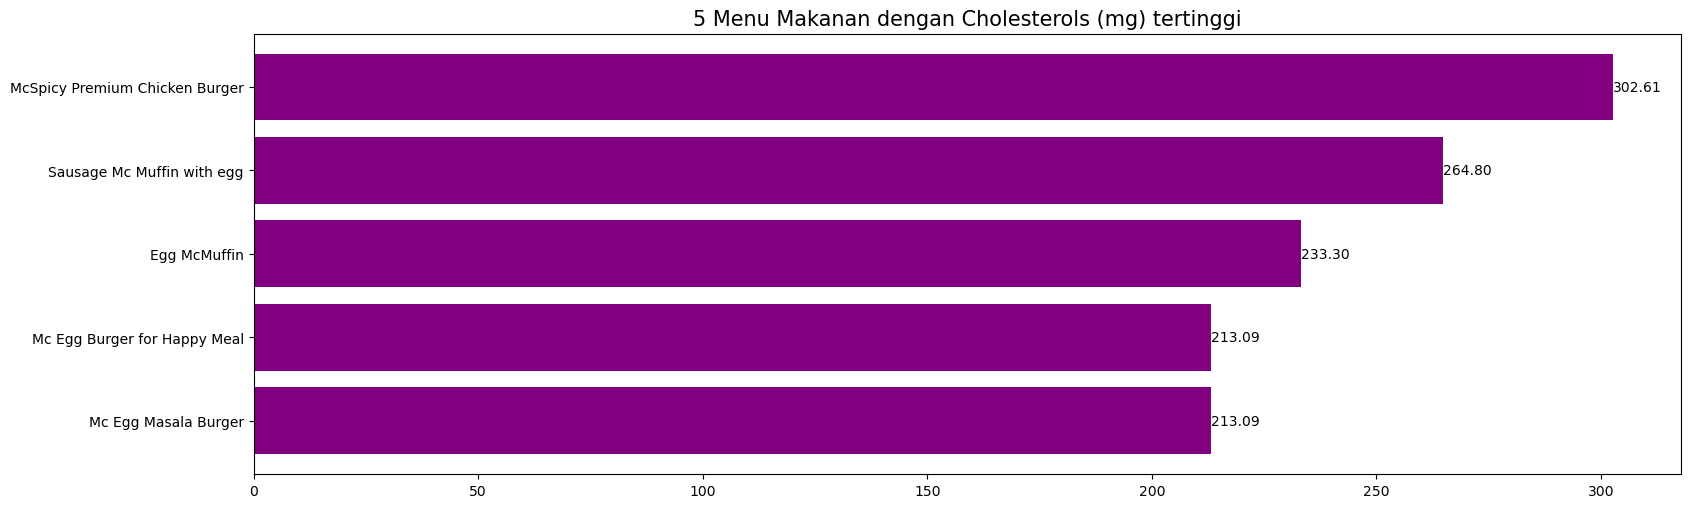

In [210]:
visualkolesteroltinggi = kolesteroltertinggi.sort_values('Cholesterols (mg)')
datavktt = visualkolesteroltinggi['Cholesterols (mg)']
indexvktt = visualkolesteroltinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvktt, datavktt, color = 'purple')
plt.title("5 Menu Makanan dengan Cholesterols (mg) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

In [211]:
## mencari 5 menu makanan dengan kadungan sodium tertinggi.
sodiumtertinggi = data[['Menu Category', 'Menu Items', 'Sodium (mg)']]
sodiumtertinggi = sodiumtertinggi.sort_values('Sodium (mg)', ascending = False)
sodiumtertinggi = pd.DataFrame(sodiumtertinggi)
sodiumtertinggi = sodiumtertinggi.head()
sodiumtertinggi

,Menu Category,Menu Items,Sodium (mg)
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,2399.49
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,1906.27
12,Regular Menu,Chicken Maharaja Mac,1854.71
107,Gourmet Menu,Chicken Cheese Lava Burger,1745.04
109,Gourmet Menu,McSpicy Premium Chicken Burger,1614.88


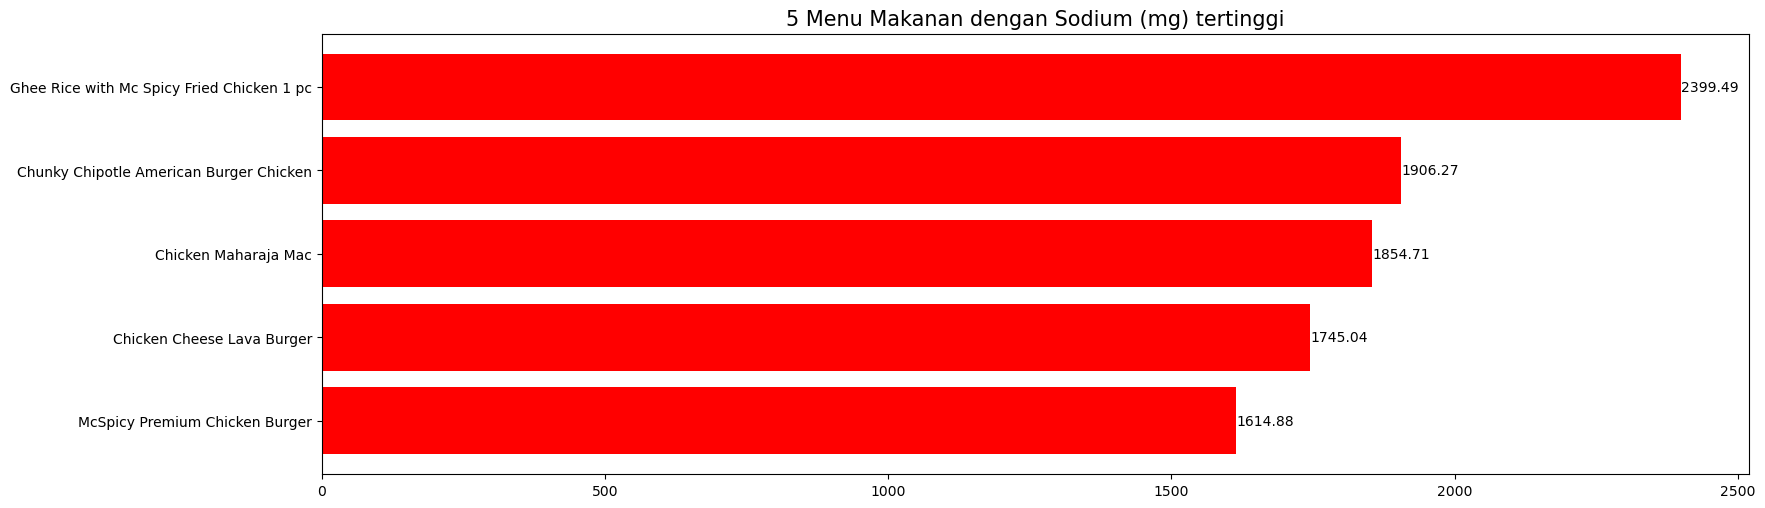

In [212]:
visualsodiumtinggi = sodiumtertinggi.sort_values('Sodium (mg)')
datavst = visualsodiumtinggi['Sodium (mg)']
indexvst = visualsodiumtinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvst, datavst, color = 'red')
plt.title("5 Menu Makanan dengan Sodium (mg) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

In [213]:
## 5 menu makanan yang memiliki kandungan lemak jenuh paling tinggi.
lemakjenuhtertinggi = data[['Menu Category', 'Menu Items', 'Sat Fat (g)']]
lemakjenuhtertinggi = lemakjenuhtertinggi.sort_values('Sat Fat (g)', ascending = False)
lemakjenuhtertinggi = pd.DataFrame(lemakjenuhtertinggi)
lemakjenuhtertinggi = lemakjenuhtertinggi.head()
lemakjenuhtertinggi

,Menu Category,Menu Items,Sat Fat (g)
110,Gourmet Menu,McSpicy Premium Veg Burger,20.46
3,Regular Menu,Spicy Paneer Wrap,19.73
24,Regular Menu,3 piece Chicken Strips,17.12
2,Regular Menu,McSpicy™ Paneer Burger,17.12
107,Gourmet Menu,Chicken Cheese Lava Burger,17.00


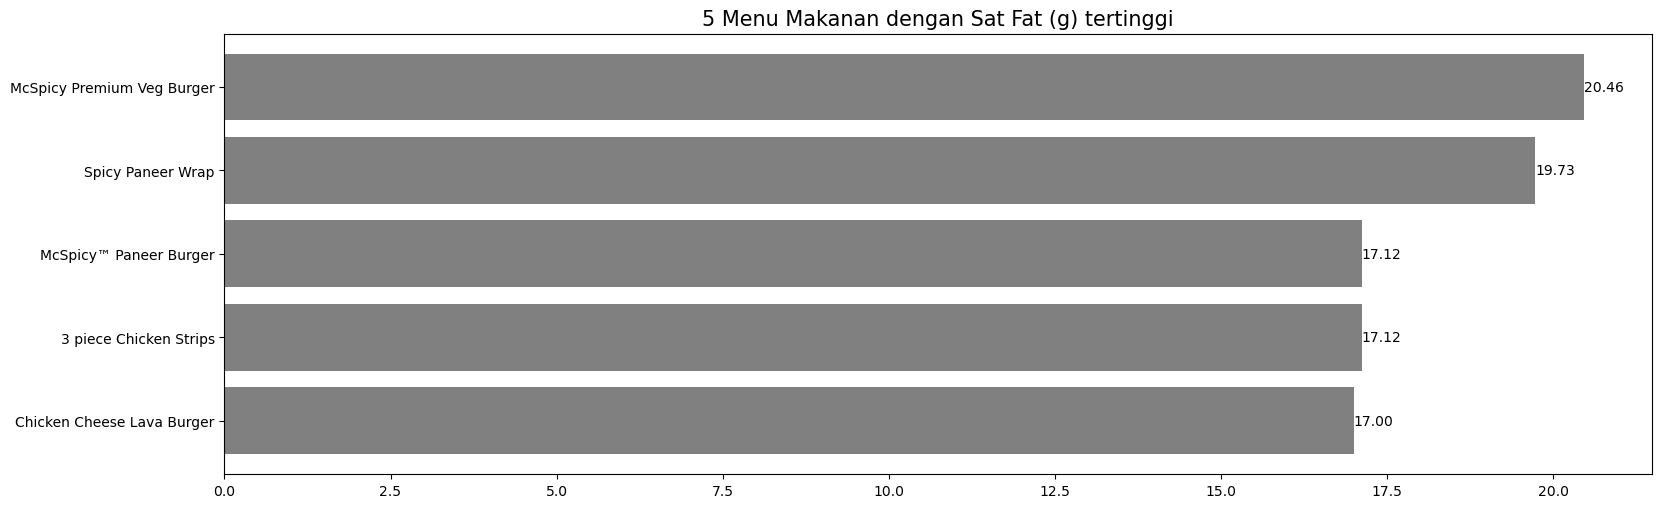

In [214]:
visuallemakjenuhtinggi = lemakjenuhtertinggi.sort_values('Sat Fat (g)')
datavljt = visuallemakjenuhtinggi['Sat Fat (g)']
indexvljt = visuallemakjenuhtinggi['Menu Items']

fig, axes = plt.subplots(figsize = (15,5))
fig.tight_layout()
bars = plt.barh(indexvljt, datavljt, color = 'grey')
plt.title("5 Menu Makanan dengan Sat Fat (g) tertinggi", fontsize = 15)

for bar in bars:
    width = bar.get_width()
    label = "{:.2f}".format(width)
    plt.text(width, bar.get_y() + bar.get_height()/2, label, ha = 'left', va = 'center')

plt.show()

## Standar gizi yang disarankan dapat berbeda-beda di setiap negara, namun secara umum, kandungan nutrisi yang sering dijadikan sebagai acuan adalah sebagai berikut:

Protein: 46-56 gram per hari (g).
Karbohidrat: 225-325 gram per hari (g).
Lemak: 44-78 gram per hari (g).
Sodium: 2300 mg perhari (mg).

Takaran nutrisi diatas yang memenuhi standar gizi setiap harinya saya dapatkan dari ChatGPT. namun saya juga memberikan sumber untuk masing-masing nutrisi dari website. hasil takaran nutrisi dari Chatgpt dan website adalah sama.

Sumber Protein : https://p2ptm.kemkes.go.id/tag/apakah-diet-protein-tinggi-benar-benar-sehat-jawabannya-mengejutkan#:~:text=Orang%20dewasa%20yang%20tidak%20begitu,perempuan%2045gr%20protein%20setiap%20hari

Sumber Karbohidrat : https://hellosehat.com/nutrisi/fakta-gizi/aturan-kebutuhan-karbohidrat-sehari/

Sumber Lemak : https://www.klikdokter.com/gaya-hidup/diet-nutrisi/kebutuhan-lemak-per-hari

Sumber Sodium : https://klubpompi.pom.go.id/article/sodium-antara-manfaat-bahaya#:~:text=Anjuran%20konsumsi%20sodium%20(dari%20berbagai,%2Fhari%2C%20tergantung%20kondisi%20tubuh.

Disini saya mengambil angka takaran tertinggi dari masing-masing nutrisi untuk standar gizi yang disarankan.

alasan saya mengambil angka takaran tertinggi, karena angka takaran tersebut kebanyakan untuk takaran orang dewasa yang berumur 19-30 tahun. kasus ini memang saya fokuskan untuk orang dewasa, karena dalam usia tersebut biasanya setiap orang sudah bebas memilih makanan untuk dirinya sendiri setiap hari.

untuk usia dibawah orang dewasa, biasanya masih dalam jangkauan/perhatian orang tua. jadi sedikit kemungkinan usia remaja dan kebawah setiap harinya memakan junkfood atau McDonalds.

## Disini saya akan mencari hasil dari asumsi saya yaitu :

Asumsi pertama : mencari rekomendasi untuk orang yang makan 3xsehari.

Protein = 56gram perhari : 3 = 18gram tiap makan

Karbohidrat = 325gram perhari : 3 = 108gram tiap makan

lemak = 78 gram perhari : 3 = 26gram tiap makan

sodium = 2300 mg perhari : 3 = 766mg tiap makan

Asumsi kedua : mencari rekomendasi menu makanan untuk orang yang makan 1xsehari, namun standar gizinya terpenuhi.

Protein = 56gram perhari

Karbohidrat = 325gram perhari

lemak = 78 gram perhari

sodium = 2300 mg perhari

## mencari rekomendasi untuk orang yang makan 3xsehari.

In [215]:
data.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [225]:
# Mencari rekomendasi untuk orang yang ingin makan mcdonalds 3xsehari, sesuai standard gizi yang dibutuhkan tubuh setiap harinya.
menu_categories = ['Regular Menu', 'Gourmet Menu', 'McCafe Menu', 'Breakfast Menu']
data_selected = data[(data['Protein (g)'] <= 18) & (data['Total carbohydrate (g)'] <= 108) & (data['Total fat (g)'] <= 26) & (data['Sodium (mg)'] <= 766) & (data['Menu Category'].isin(menu_categories))]

# Memilih kolom yang diinginkan
data_filtered = data_selected[['Menu Category', 'Menu Items', 'Per Serve Size (g/ml)', 'Energy (kCal)','Protein (g)', 'Total carbohydrate (g)', 'Total fat (g)', 'Sodium (mg)', 'Sat Fat (g)']]
data_filtered = data_filtered.sort_values(by = ['Protein (g)', 'Total carbohydrate (g)'], ascending = False)

data_filtered.head()

,Menu Category,Menu Items,Per Serve Size (g/ml),Energy (kCal),Protein (g),Total carbohydrate (g),Total fat (g),Sodium (mg),Sat Fat (g)
39,Breakfast Menu,Sausage Mc Muffin,112.0,281.44,16.25,28.62,10.81,742.60,6.04
9,Regular Menu,FILLET-O-FISH Burger,136.0,348.11,15.44,38.85,14.16,530.54,5.79
24,Regular Menu,3 piece Chicken Strips,87.0,246.65,15.26,4.02,18.57,715.83,17.12
21,Regular Menu,6 piece Chicken McNuggets,96.0,254.52,15.04,15.74,14.30,469.87,6.68
41,Breakfast Menu,Egg McMuffin,112.0,283.46,14.05,28.12,12.31,519.31,6.92


In [140]:
data_filtered.head(10)

,Menu Category,Menu Items,Per Serve Size (g/ml),Energy (kCal),Protein (g),Total carbohydrate (g),Total fat (g),Sodium (mg)
39,Breakfast Menu,Sausage Mc Muffin,112.0,281.44,16.25,28.62,10.81,742.60
9,Regular Menu,FILLET-O-FISH Burger,136.0,348.11,15.44,38.85,14.16,530.54
24,Regular Menu,3 piece Chicken Strips,87.0,246.65,15.26,4.02,18.57,715.83
21,Regular Menu,6 piece Chicken McNuggets,96.0,254.52,15.04,15.74,14.30,469.87
41,Breakfast Menu,Egg McMuffin,112.0,283.46,14.05,28.12,12.31,519.31
114,Gourmet Menu,Cheesy Veg Nuggets (9pc),135.0,378.43,12.72,35.40,19.63,642.25
16,Regular Menu,Mc Egg Masala Burger,126.2,290.42,12.45,32.89,12.27,757.91
17,Regular Menu,Mc Egg Burger for Happy Meal,123.0,282.98,12.29,31.32,12.21,399.41
57,McCafe Menu,Flat White (L),405.0,251.47,12.08,22.22,14.02,180.80
54,McCafe Menu,Latte (L),375.0,232.20,11.14,20.77,12.82,165.36


In [94]:
# Mencari menu Nasi
data_filtered = data[data['Menu Items'].str.startswith('Chicken') | data['Menu Items'].str.endswith('Chicken')]

# Menampilkan nama makanan yang memenuhi kriteria
menu_items = data_filtered['Menu Items'].tolist()
print(menu_items)

['Chicken Maharaja Mac', 'Chicken Kebab Burger', 'American Triple Cheese Chicken', 'Chicken Cheese Lava Burger', 'Chunky Chipotle American Burger Chicken']


## mencari rekomendasi menu makanan mcdonalds untuk orang yang makan (setidaknya) sehari sekali.

merubah tipe data kolom 'Per Serve Size' menjadi float agar tidak ada ambigu ketika sort values

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [58]:
data['Per Serve Size']

0       168 g
1       146 g
2       199 g
3       250 g
4       177 g
        ...  
136       8 g
137      30 g
138      14 g
139      40 g
140    180 ml
Name: Per Serve Size, Length: 141, dtype: object

In [218]:
## menghapus karakter 'g' 'ml' yang ada dikolom Per Serve Size
data['Per Serve Size'] = data['Per Serve Size'].str.replace(' g', '').str.replace(' ml', '')

In [219]:
# cek karakter 'g' 'ml' apakah masih ada
data['Per Serve Size']

0      168
1      146
2      199
3      250
4      177
      ... 
136      8
137     30
138     14
139     40
140    180
Name: Per Serve Size, Length: 141, dtype: object

In [220]:
## merubah tipe data kolom Per Serve Size menjadi float agar tidak ambigu ketika melakukan sort values
data['Per Serve Size'] = data['Per Serve Size'].astype(float)

In [221]:
## cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    float64
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(11), object(2)
memory usage: 14.4+ KB


In [222]:
## rubah nama kolom Per Serve Size menjadi Per Serve Size (g/ml)
data.rename(columns = {'Per Serve Size': 'Per Serve Size (g/ml)'}, inplace = True)

In [223]:
data.head()

,Menu Category,Menu Items,Per Serve Size (g/ml),Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168.0,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146.0,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199.0,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250.0,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177.0,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [224]:
menu_categories = ['Regular Menu', 'Gourmet Menu', 'McCafe Menu', 'Breakfast Menu']
data_selected = data[(data['Protein (g)'] <= 56) & (data['Total carbohydrate (g)'] <= 325) & (data['Total fat (g)'] <= 78) & (data['Sodium (mg)'] <= 2300) & (data['Menu Category'].isin(menu_categories))]
data_filtered = data_selected[['Menu Category', 'Menu Items', 'Per Serve Size (g/ml)', 'Energy (kCal)','Protein (g)', 'Total carbohydrate (g)', 'Total fat (g)', 'Sodium (mg)', 'Total Sugars (g)', 'Sat Fat (g)']]
data_sorted = data_filtered.sort_values(by = ['Energy (kCal)', 'Total carbohydrate (g)'], ascending = False)
data_sorted.head(5)

,Menu Category,Menu Items,Per Serve Size (g/ml),Energy (kCal),Protein (g),Total carbohydrate (g),Total fat (g),Sodium (mg),Total Sugars (g),Sat Fat (g)
107,Gourmet Menu,Chicken Cheese Lava Burger,307.0,834.36,27.37,76.03,45.18,1745.04,16.75,17.00
5,Regular Menu,Veg Maharaja Mac,306.0,832.67,24.17,93.84,37.94,1529.22,11.52,16.83
12,Regular Menu,Chicken Maharaja Mac,296.0,689.12,34.00,55.39,36.69,1854.71,8.92,10.33
3,Regular Menu,Spicy Paneer Wrap,250.0,674.68,20.96,59.27,39.10,1087.46,3.50,19.73
106,Gourmet Menu,Cheese Lava Burger,240.0,671.06,14.99,74.25,33.48,1153.99,16.27,14.12


In [124]:
data.to_csv("mcdonalds india clean.csv")